# A Simple Framework for Contrastive Learning of Visual Representations
* [paper](https://arxiv.org/abs/2002.05709)
* [weights](https://console.cloud.google.com/storage/browser/simclr-checkpoints/simclrv1?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false)


In [1]:
import torch
import torch.nn as nn

## Imagenet Classes

In [10]:
# gathered from: https://raw.githubusercontent.com/shahidedu7/imagenet-1000-classes/main/classes_names.txt
imagenet_classes = {
    0: 'tench, Tinca tinca',
    1: 'goldfish, Carassius auratus',
    2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
    3: 'tiger shark, Galeocerdo cuvieri',
    4: 'hammerhead, hammerhead shark',
    5: 'electric ray, crampfish, numbfish, torpedo',
    6: 'stingray',
    7: 'cock',
    8: 'hen',
    9: 'ostrich, Struthio camelus',
    10: 'brambling, Fringilla montifringilla',
    11: 'goldfinch, Carduelis carduelis',
    12: 'house finch, linnet, Carpodacus mexicanus',
    13: 'junco, snowbird',
    14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
    15: 'robin, American robin, Turdus migratorius',
    16: 'bulbul',
    17: 'jay',
    18: 'magpie',
    19: 'chickadee',
    20: 'water ouzel, dipper',
    21: 'kite',
    22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
    23: 'vulture',
    24: 'great grey owl, great gray owl, Strix nebulosa',
    25: 'European fire salamander, Salamandra salamandra',
    26: 'common newt, Triturus vulgaris',
    27: 'eft',
    28: 'spotted salamander, Ambystoma maculatum',
    29: 'axolotl, mud puppy, Ambystoma mexicanum',
    30: 'bullfrog, Rana catesbeiana',
    31: 'tree frog, tree-frog',
    32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
    33: 'loggerhead, loggerhead turtle, Caretta caretta',
    34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
    35: 'mud turtle',
    36: 'terrapin',
    37: 'box turtle, box tortoise',
    38: 'banded gecko',
    39: 'common iguana, iguana, Iguana iguana',
    40: 'American chameleon, anole, Anolis carolinensis',
    41: 'whiptail, whiptail lizard',
    42: 'agama',
    43: 'frilled lizard, Chlamydosaurus kingi',
    44: 'alligator lizard',
    45: 'Gila monster, Heloderma suspectum',
    46: 'green lizard, Lacerta viridis',
    47: 'African chameleon, Chamaeleo chamaeleon',
    48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
    49: 'African crocodile, Nile crocodile, Crocodylus niloticus',
    50: 'American alligator, Alligator mississipiensis',
    51: 'triceratops',
    52: 'thunder snake, worm snake, Carphophis amoenus',
    53: 'ringneck snake, ring-necked snake, ring snake',
    54: 'hognose snake, puff adder, sand viper',
    55: 'green snake, grass snake',
    56: 'king snake, kingsnake',
    57: 'garter snake, grass snake',
    58: 'water snake',
    59: 'vine snake',
    60: 'night snake, Hypsiglena torquata',
    61: 'boa constrictor, Constrictor constrictor',
    62: 'rock python, rock snake, Python sebae',
    63: 'Indian cobra, Naja naja',
    64: 'green mamba',
    65: 'sea snake',
    66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
    67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
    68: 'sidewinder, horned rattlesnake, Crotalus cerastes',
    69: 'trilobite',
    70: 'harvestman, daddy longlegs, Phalangium opilio',
    71: 'scorpion',
    72: 'black and gold garden spider, Argiope aurantia',
    73: 'barn spider, Araneus cavaticus',
    74: 'garden spider, Aranea diademata',
    75: 'black widow, Latrodectus mactans',
    76: 'tarantula',
    77: 'wolf spider, hunting spider',
    78: 'tick',
    79: 'centipede',
    80: 'black grouse',
    81: 'ptarmigan',
    82: 'ruffed grouse, partridge, Bonasa umbellus',
    83: 'prairie chicken, prairie grouse, prairie fowl',
    84: 'peacock',
    85: 'quail',
    86: 'partridge',
    87: 'African grey, African gray, Psittacus erithacus',
    88: 'macaw',
    89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
    90: 'lorikeet',
    91: 'coucal',
    92: 'bee eater',
    93: 'hornbill',
    94: 'hummingbird',
    95: 'jacamar',
    96: 'toucan',
    97: 'drake',
    98: 'red-breasted merganser, Mergus serrator',
    99: 'goose',
    100: 'black swan, Cygnus atratus',
    101: 'tusker',
    102: 'echidna, spiny anteater, anteater',
    103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
    104: 'wallaby, brush kangaroo',
    105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
    106: 'wombat',
    107: 'jellyfish',
    108: 'sea anemone, anemone',
    109: 'brain coral',
    110: 'flatworm, platyhelminth',
    111: 'nematode, nematode worm, roundworm',
    112: 'conch',
    113: 'snail',
    114: 'slug',
    115: 'sea slug, nudibranch',
    116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
    117: 'chambered nautilus, pearly nautilus, nautilus',
    118: 'Dungeness crab, Cancer magister',
    119: 'rock crab, Cancer irroratus',
    120: 'fiddler crab',
    121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica',
    122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
    123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
    124: 'crayfish, crawfish, crawdad, crawdaddy',
    125: 'hermit crab',
    126: 'isopod',
    127: 'white stork, Ciconia ciconia',
    128: 'black stork, Ciconia nigra',
    129: 'spoonbill',
    130: 'flamingo',
    131: 'little blue heron, Egretta caerulea',
    132: 'American egret, great white heron, Egretta albus',
    133: 'bittern',
    134: 'crane',
    135: 'limpkin, Aramus pictus',
    136: 'European gallinule, Porphyrio porphyrio',
    137: 'American coot, marsh hen, mud hen, water hen, Fulica americana',
    138: 'bustard',
    139: 'ruddy turnstone, Arenaria interpres',
    140: 'red-backed sandpiper, dunlin, Erolia alpina',
    141: 'redshank, Tringa totanus',
    142: 'dowitcher',
    143: 'oystercatcher, oyster catcher',
    144: 'pelican',
    145: 'king penguin, Aptenodytes patagonica',
    146: 'albatross, mollymawk',
    147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
    148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
    149: 'dugong, Dugong dugon',
    150: 'sea lion',
    151: 'Chihuahua',
    152: 'Japanese spaniel',
    153: 'Maltese dog, Maltese terrier, Maltese',
    154: 'Pekinese, Pekingese, Peke',
    155: 'Shih-Tzu',
    156: 'Blenheim spaniel',
    157: 'papillon',
    158: 'toy terrier',
    159: 'Rhodesian ridgeback',
    160: 'Afghan hound, Afghan',
    161: 'basset, basset hound',
    162: 'beagle',
    163: 'bloodhound, sleuthhound',
    164: 'bluetick',
    165: 'black-and-tan coonhound',
    166: 'Walker hound, Walker foxhound',
    167: 'English foxhound',
    168: 'redbone',
    169: 'borzoi, Russian wolfhound',
    170: 'Irish wolfhound',
    171: 'Italian greyhound',
    172: 'whippet',
    173: 'Ibizan hound, Ibizan Podenco',
    174: 'Norwegian elkhound, elkhound',
    175: 'otterhound, otter hound',
    176: 'Saluki, gazelle hound',
    177: 'Scottish deerhound, deerhound',
    178: 'Weimaraner',
    179: 'Staffordshire bullterrier, Staffordshire bull terrier',
    180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
    181: 'Bedlington terrier',
    182: 'Border terrier',
    183: 'Kerry blue terrier',
    184: 'Irish terrier',
    185: 'Norfolk terrier',
    186: 'Norwich terrier',
    187: 'Yorkshire terrier',
    188: 'wire-haired fox terrier',
    189: 'Lakeland terrier',
    190: 'Sealyham terrier, Sealyham',
    191: 'Airedale, Airedale terrier',
    192: 'cairn, cairn terrier',
    193: 'Australian terrier',
    194: 'Dandie Dinmont, Dandie Dinmont terrier',
    195: 'Boston bull, Boston terrier',
    196: 'miniature schnauzer',
    197: 'giant schnauzer',
    198: 'standard schnauzer',
    199: 'Scotch terrier, Scottish terrier, Scottie',
    200: 'Tibetan terrier, chrysanthemum dog',
    201: 'silky terrier, Sydney silky',
    202: 'soft-coated wheaten terrier',
    203: 'West Highland white terrier',
    204: 'Lhasa, Lhasa apso',
    205: 'flat-coated retriever',
    206: 'curly-coated retriever',
    207: 'golden retriever',
    208: 'Labrador retriever',
    209: 'Chesapeake Bay retriever',
    210: 'German short-haired pointer',
    211: 'vizsla, Hungarian pointer',
    212: 'English setter',
    213: 'Irish setter, red setter',
    214: 'Gordon setter',
    215: 'Brittany spaniel',
    216: 'clumber, clumber spaniel',
    217: 'English springer, English springer spaniel',
    218: 'Welsh springer spaniel',
    219: 'cocker spaniel, English cocker spaniel, cocker',
    220: 'Sussex spaniel',
    221: 'Irish water spaniel',
    222: 'kuvasz',
    223: 'schipperke',
    224: 'groenendael',
    225: 'malinois',
    226: 'briard',
    227: 'kelpie',
    228: 'komondor',
    229: 'Old English sheepdog, bobtail',
    230: 'Shetland sheepdog, Shetland sheep dog, Shetland',
    231: 'collie',
    232: 'Border collie',
    233: 'Bouvier des Flandres, Bouviers des Flandres',
    234: 'Rottweiler',
    235: 'German shepherd, German shepherd dog, German police dog, alsatian',
    236: 'Doberman, Doberman pinscher',
    237: 'miniature pinscher',
    238: 'Greater Swiss Mountain dog',
    239: 'Bernese mountain dog',
    240: 'Appenzeller',
    241: 'EntleBucher',
    242: 'boxer',
    243: 'bull mastiff',
    244: 'Tibetan mastiff',
    245: 'French bulldog',
    246: 'Great Dane',
    247: 'Saint Bernard, St Bernard',
    248: 'Eskimo dog, husky',
    249: 'malamute, malemute, Alaskan malamute',
    250: 'Siberian husky',
    251: 'dalmatian, coach dog, carriage dog',
    252: 'affenpinscher, monkey pinscher, monkey dog',
    253: 'basenji',
    254: 'pug, pug-dog',
    255: 'Leonberg',
    256: 'Newfoundland, Newfoundland dog',
    257: 'Great Pyrenees',
    258: 'Samoyed, Samoyede',
    259: 'Pomeranian',
    260: 'chow, chow chow',
    261: 'keeshond',
    262: 'Brabancon griffon',
    263: 'Pembroke, Pembroke Welsh corgi',
    264: 'Cardigan, Cardigan Welsh corgi',
    265: 'toy poodle',
    266: 'miniature poodle',
    267: 'standard poodle',
    268: 'Mexican hairless',
    269: 'timber wolf, grey wolf, gray wolf, Canis lupus',
    270: 'white wolf, Arctic wolf, Canis lupus tundrarum',
    271: 'red wolf, maned wolf, Canis rufus, Canis niger',
    272: 'coyote, prairie wolf, brush wolf, Canis latrans',
    273: 'dingo, warrigal, warragal, Canis dingo',
    274: 'dhole, Cuon alpinus',
    275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
    276: 'hyena, hyaena',
    277: 'red fox, Vulpes vulpes',
    278: 'kit fox, Vulpes macrotis',
    279: 'Arctic fox, white fox, Alopex lagopus',
    280: 'grey fox, gray fox, Urocyon cinereoargenteus',
    281: 'tabby, tabby cat',
    282: 'tiger cat',
    283: 'Persian cat',
    284: 'Siamese cat, Siamese',
    285: 'Egyptian cat',
    286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
    287: 'lynx, catamount',
    288: 'leopard, Panthera pardus',
    289: 'snow leopard, ounce, Panthera uncia',
    290: 'jaguar, panther, Panthera onca, Felis onca',
    291: 'lion, king of beasts, Panthera leo',
    292: 'tiger, Panthera tigris',
    293: 'cheetah, chetah, Acinonyx jubatus',
    294: 'brown bear, bruin, Ursus arctos',
    295: 'American black bear, black bear, Ursus americanus, Euarctos americanus',
    296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus',
    297: 'sloth bear, Melursus ursinus, Ursus ursinus',
    298: 'mongoose',
    299: 'meerkat, mierkat',
    300: 'tiger beetle',
    301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle',
    302: 'ground beetle, carabid beetle',
    303: 'long-horned beetle, longicorn, longicorn beetle',
    304: 'leaf beetle, chrysomelid',
    305: 'dung beetle',
    306: 'rhinoceros beetle',
    307: 'weevil',
    308: 'fly',
    309: 'bee',
    310: 'ant, emmet, pismire',
    311: 'grasshopper, hopper',
    312: 'cricket',
    313: 'walking stick, walkingstick, stick insect',
    314: 'cockroach, roach',
    315: 'mantis, mantid',
    316: 'cicada, cicala',
    317: 'leafhopper',
    318: 'lacewing, lacewing fly',
    319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
    320: 'damselfly',
    321: 'admiral',
    322: 'ringlet, ringlet butterfly',
    323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
    324: 'cabbage butterfly',
    325: 'sulphur butterfly, sulfur butterfly',
    326: 'lycaenid, lycaenid butterfly',
    327: 'starfish, sea star',
    328: 'sea urchin',
    329: 'sea cucumber, holothurian',
    330: 'wood rabbit, cottontail, cottontail rabbit',
    331: 'hare',
    332: 'Angora, Angora rabbit',
    333: 'hamster',
    334: 'porcupine, hedgehog',
    335: 'fox squirrel, eastern fox squirrel, Sciurus niger',
    336: 'marmot',
    337: 'beaver',
    338: 'guinea pig, Cavia cobaya',
    339: 'sorrel',
    340: 'zebra',
    341: 'hog, pig, grunter, squealer, Sus scrofa',
    342: 'wild boar, boar, Sus scrofa',
    343: 'warthog',
    344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
    345: 'ox',
    346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
    347: 'bison',
    348: 'ram, tup',
    349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
    350: 'ibex, Capra ibex',
    351: 'hartebeest',
    352: 'impala, Aepyceros melampus',
    353: 'gazelle',
    354: 'Arabian camel, dromedary, Camelus dromedarius',
    355: 'llama',
    356: 'weasel',
    357: 'mink',
    358: 'polecat, fitch, foulmart, foumart, Mustela putorius',
    359: 'black-footed ferret, ferret, Mustela nigripes',
    360: 'otter',
    361: 'skunk, polecat, wood pussy',
    362: 'badger',
    363: 'armadillo',
    364: 'three-toed sloth, ai, Bradypus tridactylus',
    365: 'orangutan, orang, orangutang, Pongo pygmaeus',
    366: 'gorilla, Gorilla gorilla',
    367: 'chimpanzee, chimp, Pan troglodytes',
    368: 'gibbon, Hylobates lar',
    369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
    370: 'guenon, guenon monkey',
    371: 'patas, hussar monkey, Erythrocebus patas',
    372: 'baboon',
    373: 'macaque',
    374: 'langur',
    375: 'colobus, colobus monkey',
    376: 'proboscis monkey, Nasalis larvatus',
    377: 'marmoset',
    378: 'capuchin, ringtail, Cebus capucinus',
    379: 'howler monkey, howler',
    380: 'titi, titi monkey',
    381: 'spider monkey, Ateles geoffroyi',
    382: 'squirrel monkey, Saimiri sciureus',
    383: 'Madagascar cat, ring-tailed lemur, Lemur catta',
    384: 'indri, indris, Indri indri, Indri brevicaudatus',
    385: 'Indian elephant, Elephas maximus',
    386: 'African elephant, Loxodonta africana',
    387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
    388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
    389: 'barracouta, snoek',
    390: 'eel',
    391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',
    392: 'rock beauty, Holocanthus tricolor',
    393: 'anemone fish',
    394: 'sturgeon',
    395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',
    396: 'lionfish',
    397: 'puffer, pufferfish, blowfish, globefish',
    398: 'abacus',
    399: 'abaya',
    400: "academic gown, academic robe, judge's robe",
    401: 'accordion, piano accordion, squeeze box',
    402: 'acoustic guitar',
    403: 'aircraft carrier, carrier, flattop, attack aircraft carrier',
    404: 'airliner',
    405: 'airship, dirigible',
    406: 'altar',
    407: 'ambulance',
    408: 'amphibian, amphibious vehicle',
    409: 'analog clock',
    410: 'apiary, bee house',
    411: 'apron',
    412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
    413: 'assault rifle, assault gun',
    414: 'backpack, back pack, knapsack, packsack, rucksack, haversack',
    415: 'bakery, bakeshop, bakehouse',
    416: 'balance beam, beam',
    417: 'balloon',
    418: 'ballpoint, ballpoint pen, ballpen, Biro',
    419: 'Band Aid',
    420: 'banjo',
    421: 'bannister, banister, balustrade, balusters, handrail',
    422: 'barbell',
    423: 'barber chair',
    424: 'barbershop',
    425: 'barn',
    426: 'barometer',
    427: 'barrel, cask',
    428: 'barrow, garden cart, lawn cart, wheelbarrow',
    429: 'baseball',
    430: 'basketball',
    431: 'bassinet',
    432: 'bassoon',
    433: 'bathing cap, swimming cap',
    434: 'bath towel',
    435: 'bathtub, bathing tub, bath, tub',
    436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
    437: 'beacon, lighthouse, beacon light, pharos',
    438: 'beaker',
    439: 'bearskin, busby, shako',
    440: 'beer bottle',
    441: 'beer glass',
    442: 'bell cote, bell cot',
    443: 'bib',
    444: 'bicycle-built-for-two, tandem bicycle, tandem',
    445: 'bikini, two-piece',
    446: 'binder, ring-binder',
    447: 'binoculars, field glasses, opera glasses',
    448: 'birdhouse',
    449: 'boathouse',
    450: 'bobsled, bobsleigh, bob',
    451: 'bolo tie, bolo, bola tie, bola',
    452: 'bonnet, poke bonnet',
    453: 'bookcase',
    454: 'bookshop, bookstore, bookstall',
    455: 'bottlecap',
    456: 'bow',
    457: 'bow tie, bow-tie, bowtie',
    458: 'brass, memorial tablet, plaque',
    459: 'brassiere, bra, bandeau',
    460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty',
    461: 'breastplate, aegis, egis',
    462: 'broom',
    463: 'bucket, pail',
    464: 'buckle',
    465: 'bulletproof vest',
    466: 'bullet train, bullet',
    467: 'butcher shop, meat market',
    468: 'cab, hack, taxi, taxicab',
    469: 'caldron, cauldron',
    470: 'candle, taper, wax light',
    471: 'cannon',
    472: 'canoe',
    473: 'can opener, tin opener',
    474: 'cardigan',
    475: 'car mirror',
    476: 'carousel, carrousel, merry-go-round, roundabout, whirligig',
    477: "carpenter's kit, tool kit",
    478: 'carton',
    479: 'car wheel',
    480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
    481: 'cassette',
    482: 'cassette player',
    483: 'castle',
    484: 'catamaran',
    485: 'CD player',
    486: 'cello, violoncello',
    487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone',
    488: 'chain',
    489: 'chainlink fence',
    490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour',
    491: 'chain saw, chainsaw',
    492: 'chest',
    493: 'chiffonier, commode',
    494: 'chime, bell, gong',
    495: 'china cabinet, china closet',
    496: 'Christmas stocking',
    497: 'church, church building',
    498: 'cinema, movie theater, movie theatre, movie house, picture palace',
    499: 'cleaver, meat cleaver, chopper',
    500: 'cliff dwelling',
    501: 'cloak',
    502: 'clog, geta, patten, sabot',
    503: 'cocktail shaker',
    504: 'coffee mug',
    505: 'coffeepot',
    506: 'coil, spiral, volute, whorl, helix',
    507: 'combination lock',
    508: 'computer keyboard, keypad',
    509: 'confectionery, confectionary, candy store',
    510: 'container ship, containership, container vessel',
    511: 'convertible',
    512: 'corkscrew, bottle screw',
    513: 'cornet, horn, trumpet, trump',
    514: 'cowboy boot',
    515: 'cowboy hat, ten-gallon hat',
    516: 'cradle',
    517: 'crane',
    518: 'crash helmet',
    519: 'crate',
    520: 'crib, cot',
    521: 'Crock Pot',
    522: 'croquet ball',
    523: 'crutch',
    524: 'cuirass',
    525: 'dam, dike, dyke',
    526: 'desk',
    527: 'desktop computer',
    528: 'dial telephone, dial phone',
    529: 'diaper, nappy, napkin',
    530: 'digital clock',
    531: 'digital watch',
    532: 'dining table, board',
    533: 'dishrag, dishcloth',
    534: 'dishwasher, dish washer, dishwashing machine',
    535: 'disk brake, disc brake',
    536: 'dock, dockage, docking facility',
    537: 'dogsled, dog sled, dog sleigh',
    538: 'dome',
    539: 'doormat, welcome mat',
    540: 'drilling platform, offshore rig',
    541: 'drum, membranophone, tympan',
    542: 'drumstick',
    543: 'dumbbell',
    544: 'Dutch oven',
    545: 'electric fan, blower',
    546: 'electric guitar',
    547: 'electric locomotive',
    548: 'entertainment center',
    549: 'envelope',
    550: 'espresso maker',
    551: 'face powder',
    552: 'feather boa, boa',
    553: 'file, file cabinet, filing cabinet',
    554: 'fireboat',
    555: 'fire engine, fire truck',
    556: 'fire screen, fireguard',
    557: 'flagpole, flagstaff',
    558: 'flute, transverse flute',
    559: 'folding chair',
    560: 'football helmet',
    561: 'forklift',
    562: 'fountain',
    563: 'fountain pen',
    564: 'four-poster',
    565: 'freight car',
    566: 'French horn, horn',
    567: 'frying pan, frypan, skillet',
    568: 'fur coat',
    569: 'garbage truck, dustcart',
    570: 'gasmask, respirator, gas helmet',
    571: 'gas pump, gasoline pump, petrol pump, island dispenser',
    572: 'goblet',
    573: 'go-kart',
    574: 'golf ball',
    575: 'golfcart, golf cart',
    576: 'gondola',
    577: 'gong, tam-tam',
    578: 'gown',
    579: 'grand piano, grand',
    580: 'greenhouse, nursery, glasshouse',
    581: 'grille, radiator grille',
    582: 'grocery store, grocery, food market, market',
    583: 'guillotine',
    584: 'hair slide',
    585: 'hair spray',
    586: 'half track',
    587: 'hammer',
    588: 'hamper',
    589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier',
    590: 'hand-held computer, hand-held microcomputer',
    591: 'handkerchief, hankie, hanky, hankey',
    592: 'hard disc, hard disk, fixed disk',
    593: 'harmonica, mouth organ, harp, mouth harp',
    594: 'harp',
    595: 'harvester, reaper',
    596: 'hatchet',
    597: 'holster',
    598: 'home theater, home theatre',
    599: 'honeycomb',
    600: 'hook, claw',
    601: 'hoopskirt, crinoline',
    602: 'horizontal bar, high bar',
    603: 'horse cart, horse-cart',
    604: 'hourglass',
    605: 'iPod',
    606: 'iron, smoothing iron',
    607: "jack-o'-lantern",
    608: 'jean, blue jean, denim',
    609: 'jeep, landrover',
    610: 'jersey, T-shirt, tee shirt',
    611: 'jigsaw puzzle',
    612: 'jinrikisha, ricksha, rickshaw',
    613: 'joystick',
    614: 'kimono',
    615: 'knee pad',
    616: 'knot',
    617: 'lab coat, laboratory coat',
    618: 'ladle',
    619: 'lampshade, lamp shade',
    620: 'laptop, laptop computer',
    621: 'lawn mower, mower',
    622: 'lens cap, lens cover',
    623: 'letter opener, paper knife, paperknife',
    624: 'library',
    625: 'lifeboat',
    626: 'lighter, light, igniter, ignitor',
    627: 'limousine, limo',
    628: 'liner, ocean liner',
    629: 'lipstick, lip rouge',
    630: 'Loafer',
    631: 'lotion',
    632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system',
    633: "loupe, jeweler's loupe",
    634: 'lumbermill, sawmill',
    635: 'magnetic compass',
    636: 'mailbag, postbag',
    637: 'mailbox, letter box',
    638: 'maillot',
    639: 'maillot, tank suit',
    640: 'manhole cover',
    641: 'maraca',
    642: 'marimba, xylophone',
    643: 'mask',
    644: 'matchstick',
    645: 'maypole',
    646: 'maze, labyrinth',
    647: 'measuring cup',
    648: 'medicine chest, medicine cabinet',
    649: 'megalith, megalithic structure',
    650: 'microphone, mike',
    651: 'microwave, microwave oven',
    652: 'military uniform',
    653: 'milk can',
    654: 'minibus',
    655: 'miniskirt, mini',
    656: 'minivan',
    657: 'missile',
    658: 'mitten',
    659: 'mixing bowl',
    660: 'mobile home, manufactured home',
    661: 'Model T',
    662: 'modem',
    663: 'monastery',
    664: 'monitor',
    665: 'moped',
    666: 'mortar',
    667: 'mortarboard',
    668: 'mosque',
    669: 'mosquito net',
    670: 'motor scooter, scooter',
    671: 'mountain bike, all-terrain bike, off-roader',
    672: 'mountain tent',
    673: 'mouse, computer mouse',
    674: 'mousetrap',
    675: 'moving van',
    676: 'muzzle',
    677: 'nail',
    678: 'neck brace',
    679: 'necklace',
    680: 'nipple',
    681: 'notebook, notebook computer',
    682: 'obelisk',
    683: 'oboe, hautboy, hautbois',
    684: 'ocarina, sweet potato',
    685: 'odometer, hodometer, mileometer, milometer',
    686: 'oil filter',
    687: 'organ, pipe organ',
    688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO',
    689: 'overskirt',
    690: 'oxcart',
    691: 'oxygen mask',
    692: 'packet',
    693: 'paddle, boat paddle',
    694: 'paddlewheel, paddle wheel',
    695: 'padlock',
    696: 'paintbrush',
    697: "pajama, pyjama, pj's, jammies",
    698: 'palace',
    699: 'panpipe, pandean pipe, syrinx',
    700: 'paper towel',
    701: 'parachute, chute',
    702: 'parallel bars, bars',
    703: 'park bench',
    704: 'parking meter',
    705: 'passenger car, coach, carriage',
    706: 'patio, terrace',
    707: 'pay-phone, pay-station',
    708: 'pedestal, plinth, footstall',
    709: 'pencil box, pencil case',
    710: 'pencil sharpener',
    711: 'perfume, essence',
    712: 'Petri dish',
    713: 'photocopier',
    714: 'pick, plectrum, plectron',
    715: 'pickelhaube',
    716: 'picket fence, paling',
    717: 'pickup, pickup truck',
    718: 'pier',
    719: 'piggy bank, penny bank',
    720: 'pill bottle',
    721: 'pillow',
    722: 'ping-pong ball',
    723: 'pinwheel',
    724: 'pirate, pirate ship',
    725: 'pitcher, ewer',
    726: "plane, carpenter's plane, woodworking plane",
    727: 'planetarium',
    728: 'plastic bag',
    729: 'plate rack',
    730: 'plow, plough',
    731: "plunger, plumber's helper",
    732: 'Polaroid camera, Polaroid Land camera',
    733: 'pole',
    734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
    735: 'poncho',
    736: 'pool table, billiard table, snooker table',
    737: 'pop bottle, soda bottle',
    738: 'pot, flowerpot',
    739: "potter's wheel",
    740: 'power drill',
    741: 'prayer rug, prayer mat',
    742: 'printer',
    743: 'prison, prison house',
    744: 'projectile, missile',
    745: 'projector',
    746: 'puck, hockey puck',
    747: 'punching bag, punch bag, punching ball, punchball',
    748: 'purse',
    749: 'quill, quill pen',
    750: 'quilt, comforter, comfort, puff',
    751: 'racer, race car, racing car',
    752: 'racket, racquet',
    753: 'radiator',
    754: 'radio, wireless',
    755: 'radio telescope, radio reflector',
    756: 'rain barrel',
    757: 'recreational vehicle, RV, R.V.',
    758: 'reel',
    759: 'reflex camera',
    760: 'refrigerator, icebox',
    761: 'remote control, remote',
    762: 'restaurant, eating house, eating place, eatery',
    763: 'revolver, six-gun, six-shooter',
    764: 'rifle',
    765: 'rocking chair, rocker',
    766: 'rotisserie',
    767: 'rubber eraser, rubber, pencil eraser',
    768: 'rugby ball',
    769: 'rule, ruler',
    770: 'running shoe',
    771: 'safe',
    772: 'safety pin',
    773: 'saltshaker, salt shaker',
    774: 'sandal',
    775: 'sarong',
    776: 'sax, saxophone',
    777: 'scabbard',
    778: 'scale, weighing machine',
    779: 'school bus',
    780: 'schooner',
    781: 'scoreboard',
    782: 'screen, CRT screen',
    783: 'screw',
    784: 'screwdriver',
    785: 'seat belt, seatbelt',
    786: 'sewing machine',
    787: 'shield, buckler',
    788: 'shoe shop, shoe-shop, shoe store',
    789: 'shoji',
    790: 'shopping basket',
    791: 'shopping cart',
    792: 'shovel',
    793: 'shower cap',
    794: 'shower curtain',
    795: 'ski',
    796: 'ski mask',
    797: 'sleeping bag',
    798: 'slide rule, slipstick',
    799: 'sliding door',
    800: 'slot, one-armed bandit',
    801: 'snorkel',
    802: 'snowmobile',
    803: 'snowplow, snowplough',
    804: 'soap dispenser',
    805: 'soccer ball',
    806: 'sock',
    807: 'solar dish, solar collector, solar furnace',
    808: 'sombrero',
    809: 'soup bowl',
    810: 'space bar',
    811: 'space heater',
    812: 'space shuttle',
    813: 'spatula',
    814: 'speedboat',
    815: "spider web, spider's web",
    816: 'spindle',
    817: 'sports car, sport car',
    818: 'spotlight, spot',
    819: 'stage',
    820: 'steam locomotive',
    821: 'steel arch bridge',
    822: 'steel drum',
    823: 'stethoscope',
    824: 'stole',
    825: 'stone wall',
    826: 'stopwatch, stop watch',
    827: 'stove',
    828: 'strainer',
    829: 'streetcar, tram, tramcar, trolley, trolley car',
    830: 'stretcher',
    831: 'studio couch, day bed',
    832: 'stupa, tope',
    833: 'submarine, pigboat, sub, U-boat',
    834: 'suit, suit of clothes',
    835: 'sundial',
    836: 'sunglass',
    837: 'sunglasses, dark glasses, shades',
    838: 'sunscreen, sunblock, sun blocker',
    839: 'suspension bridge',
    840: 'swab, swob, mop',
    841: 'sweatshirt',
    842: 'swimming trunks, bathing trunks',
    843: 'swing',
    844: 'switch, electric switch, electrical switch',
    845: 'syringe',
    846: 'table lamp',
    847: 'tank, army tank, armored combat vehicle, armoured combat vehicle',
    848: 'tape player',
    849: 'teapot',
    850: 'teddy, teddy bear',
    851: 'television, television system',
    852: 'tennis ball',
    853: 'thatch, thatched roof',
    854: 'theater curtain, theatre curtain',
    855: 'thimble',
    856: 'thresher, thrasher, threshing machine',
    857: 'throne',
    858: 'tile roof',
    859: 'toaster',
    860: 'tobacco shop, tobacconist shop, tobacconist',
    861: 'toilet seat',
    862: 'torch',
    863: 'totem pole',
    864: 'tow truck, tow car, wrecker',
    865: 'toyshop',
    866: 'tractor',
    867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
    868: 'tray',
    869: 'trench coat',
    870: 'tricycle, trike, velocipede',
    871: 'trimaran',
    872: 'tripod',
    873: 'triumphal arch',
    874: 'trolleybus, trolley coach, trackless trolley',
    875: 'trombone',
    876: 'tub, vat',
    877: 'turnstile',
    878: 'typewriter keyboard',
    879: 'umbrella',
    880: 'unicycle, monocycle',
    881: 'upright, upright piano',
    882: 'vacuum, vacuum cleaner',
    883: 'vase',
    884: 'vault',
    885: 'velvet',
    886: 'vending machine',
    887: 'vestment',
    888: 'viaduct',
    889: 'violin, fiddle',
    890: 'volleyball',
    891: 'waffle iron',
    892: 'wall clock',
    893: 'wallet, billfold, notecase, pocketbook',
    894: 'wardrobe, closet, press',
    895: 'warplane, military plane',
    896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin',
    897: 'washer, automatic washer, washing machine',
    898: 'water bottle',
    899: 'water jug',
    900: 'water tower',
    901: 'whiskey jug',
    902: 'whistle',
    903: 'wig',
    904: 'window screen',
    905: 'window shade',
    906: 'Windsor tie',
    907: 'wine bottle',
    908: 'wing',
    909: 'wok',
    910: 'wooden spoon',
    911: 'wool, woolen, woollen',
    912: 'worm fence, snake fence, snake-rail fence, Virginia fence',
    913: 'wreck',
    914: 'yawl',
    915: 'yurt',
    916: 'web site, website, internet site, site',
    917: 'comic book',
    918: 'crossword puzzle, crossword',
    919: 'street sign',
    920: 'traffic light, traffic signal, stoplight',
    921: 'book jacket, dust cover, dust jacket, dust wrapper',
    922: 'menu',
    923: 'plate',
    924: 'guacamole',
    925: 'consomme',
    926: 'hot pot, hotpot',
    927: 'trifle',
    928: 'ice cream, icecream',
    929: 'ice lolly, lolly, lollipop, popsicle',
    930: 'French loaf',
    931: 'bagel, beigel',
    932: 'pretzel',
    933: 'cheeseburger',
    934: 'hotdog, hot dog, red hot',
    935: 'mashed potato',
    936: 'head cabbage',
    937: 'broccoli',
    938: 'cauliflower',
    939: 'zucchini, courgette',
    940: 'spaghetti squash',
    941: 'acorn squash',
    942: 'butternut squash',
    943: 'cucumber, cuke',
    944: 'artichoke, globe artichoke',
    945: 'bell pepper',
    946: 'cardoon',
    947: 'mushroom',
    948: 'Granny Smith',
    949: 'strawberry',
    950: 'orange',
    951: 'lemon',
    952: 'fig',
    953: 'pineapple, ananas',
    954: 'banana',
    955: 'jackfruit, jak, jack',
    956: 'custard apple',
    957: 'pomegranate',
    958: 'hay',
    959: 'carbonara',
    960: 'chocolate sauce, chocolate syrup',
    961: 'dough',
    962: 'meat loaf, meatloaf',
    963: 'pizza, pizza pie',
    964: 'potpie',
    965: 'burrito',
    966: 'red wine',
    967: 'espresso',
    968: 'cup',
    969: 'eggnog',
    970: 'alp',
    971: 'bubble',
    972: 'cliff, drop, drop-off',
    973: 'coral reef',
    974: 'geyser',
    975: 'lakeside, lakeshore',
    976: 'promontory, headland, head, foreland',
    977: 'sandbar, sand bar',
    978: 'seashore, coast, seacoast, sea-coast',
    979: 'valley, vale',
    980: 'volcano',
    981: 'ballplayer, baseball player',
    982: 'groom, bridegroom',
    983: 'scuba diver',
    984: 'rapeseed',
    985: 'daisy',
    986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
    987: 'corn',
    988: 'acorn',
    989: 'hip, rose hip, rosehip',
    990: 'buckeye, horse chestnut, conker',
    991: 'coral fungus',
    992: 'agaric',
    993: 'gyromitra',
    994: 'stinkhorn, carrion fungus',
    995: 'earthstar',
    996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa',
    997: 'bolete',
    998: 'ear, spike, capitulum',
    999: 'toilet tissue, toilet paper, bathroom tissue'
}

## CIFAR10 Classes

In [11]:
# gathered from: https://www.cs.toronto.edu/~kriz/cifar.html
cifar10_classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

## Getting and Converting Weights

In [12]:
import tensorflow as tf

# convert simclr tf_weights to pytorch_weights
def to_pytorch(tf_weights, model_dict):
    torch_weights = dict()
    for layer in tf_weights:
        weights = torch.from_numpy(tf_weights[layer])
        layer = layer.replace('/', '.')
        layer = layer.replace('base_model', 'encoder')
        layer = layer.replace('kernel', 'weight')
        layer = layer.replace('moving', 'running')
        layer = layer.replace('gamma', 'weight')
        layer = layer.replace('beta', 'bias')
        layer = layer.replace('variance', 'var')
        layer = layer.replace('batch_normalization', 'bn')
        layer = layer.replace('conv2d', 'conv')
        layer = layer.replace('head_supervised.linear_layer.dense', 'head.ff1')
        h1, _, t1 = layer.partition('_')
        if t1 != '' and t1[0].isdigit():
            h2, _, t2 = h1.partition('.')
            num, _, t3 = t1.partition('.')
            num = int(num)
            layer_idx = 'layer'

            # get layer_idx and normalize num
            if num <= 10:   # layer 1 (10 = 3blocks * 3convs + 1)
                layer_idx += '1'
            elif num <= 23: # layer 2 (23 = prev + 4blocks * 3convs + 1)
                num -= 10
                layer_idx += '2'
            elif num <= 42: # layer 3 (42 = prev + 6blocks * 3convs + 1)
                num -= 23
                layer_idx += '3'
            else:           # layer 4 (52 = prev + 3blocks * 3convs + 1)
                num -= 42
                layer_idx += '4'

            # change layer name
            if num == 1 and 'conv' in layer:
                layer = '.'.join([h2, layer_idx, '0', 'downsample.0', t3])
            elif num == 1 and 'bn' in layer:
                layer = '.'.join([h2, layer_idx, '0', 'downsample.1', t3])
            else:
                num -= 2
                block, idx  = divmod(num, 3)
                layer = '.'.join([h2, layer_idx, str(block),
                                  ('conv' if 'conv' in layer else 'bn') + str(idx+1), t3])
        elif 'conv.' in layer:
            layer = layer.replace('conv.', 'conv1.')
        elif 'bn.' in layer:
            layer = layer.replace('bn.', 'bn1.')

        # permuting weights
        if 'conv' in layer or 'downsample.0' in layer:
            weights = weights.permute(3,2,0,1)
        elif 'ff' in layer and 'weight' in layer:
            weights = weights.T

        assert layer in model_dict, "layer not in resnet model"
        assert layer not in torch_weights, "layer already in dict"
        torch_weights[layer] = weights

    return torch_weights

**TODO**: probably should turn this into a python function

In [13]:
# finetune-10%, 1x width
!rm -r 1x
!gsutil -m cp -r \
  "gs://simclr-checkpoints/simclrv1/finetune_10pct/1x" \
  .

rm: cannot remove '1x': No such file or directory
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/checkpoint...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/graph.pbtxt...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/model.ckpt-939.data-00000-of-00001...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/model.ckpt-939.index...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/hub/variables/variables.index...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/hub/saved_model.pb...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/hub/tfhub_module.pb...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/result_939.json...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/model.ckpt-939.meta...
Copying gs://simclr-checkpoints/simclrv1/finetune_10pct/1x/hub/variables/variables.data-00000-of-00001...
/ [10/10 files][475.0 MiB/475.0 MiB] 100% Done                                  
Operation completed o

In [14]:
# finetune-100%, 1x width
!rm -r 1x
!gsutil -m cp -r \
  "gs://simclr-checkpoints/simclrv1/finetune_100pct/1x" \
  .

Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/hub/variables/variables.index...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/checkpoint...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/hub/saved_model.pb...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/model.ckpt-9384.data-00000-of-00001...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/graph.pbtxt...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/model.ckpt-9384.index...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/result_9384.json...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/model.ckpt-9384.meta...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/hub/variables/variables.data-00000-of-00001...
Copying gs://simclr-checkpoints/simclrv1/finetune_100pct/1x/hub/tfhub_module.pb...
| [10/10 files][438.0 MiB/438.0 MiB] 100% Done                                  
Operation completed over 10 objects/438.0 MiB.           

In [15]:
# pretrained weights, 1x width
!rm -r 1x
!gsutil -m cp -r \
  "gs://simclr-checkpoints/simclrv1/pretrain/1x" \
  .

Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/hub/variables/variables.index...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/model.ckpt-225206.data-00000-of-00001...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/model.ckpt-225206.index...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/model.ckpt-225206.meta...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/checkpoint...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/graph.pbtxt...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/hub/saved_model.pb...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/hub/tfhub_module.pb...
Copying gs://simclr-checkpoints/simclrv1/pretrain/1x/hub/variables/variables.data-00000-of-00001...
\ [9/9 files][213.3 MiB/213.3 MiB] 100% Done                                    
Operation completed over 9 objects/213.3 MiB.                                    


## Model

SimCLR uses ResNet-50 for the encoder model.

In [16]:
from torchvision.models import resnet

class TrainHead(nn.Module):
    def __init__(self, cifar=False):
        super().__init__()
        h_dim = 2048 if not cifar else 512
        self.ff1 = nn.Linear(h_dim, 2048)
        self.ff2 = nn.Linear(2048, 128)

    def forward(self, x):
        out = torch.relu(self.ff1(x))
        out = self.ff2(out)
        return out

class LinearClassifierHead(nn.Module):
    def __init__(self, cifar):
        super().__init__()
        h_dim = 2048 if not cifar else 512
        self.ff1 = nn.Linear(h_dim, 1000)

    def forward(self, x):
        out = self.ff1(x)
        return out

# TODO: change conv1 for training smaller CIFAR images as described in paper
class Encoder(resnet.ResNet):
    def __init__(self, block, layers, cifar):
        super().__init__(block, layers)
        self.cifar = cifar
        if cifar:
            self.conv1 = nn.Conv2d(3, 64, 3)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        if not self.cifar:
            out = self.maxpool(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = torch.flatten(self.avgpool(out), 1, -1)
        return out

class SimCLR(nn.Module):
    def __init__(self, head: nn.Module=None, resnet18=False, cifar=False):
        super().__init__()
        block = resnet.Bottleneck if not resnet18 else resnet.BasicBlock
        layers = [3,4,6,3] if not resnet18 else [2,2,2,2]
        self.encoder = Encoder(block, layers, cifar)
        self.head = head(cifar)

    def forward(self, x):
        out = self.encoder(x)
        if self.head != None:
            out = self.head(out)
        return out

    def load_pretrained_weights(self):
        params = self.state_dict()
        vars = map(lambda x: x[0], tf.train.list_variables('1x'))
        
        reader = tf.train.load_checkpoint('1x')
        layers = {layer: reader.get_tensor(layer)\
                for layer in vars if layer != 'global_step'\
                    and 'Momentum' not in layer}
        
        loaded_params = to_pytorch(layers, params)
        for layer in params:
            if layer not in loaded_params:
                loaded_params[layer] = torch.zeros_like(params[layer])
        
        self.load_state_dict(loaded_params)


Results for this part are not that interesting (architecture is just resnet). Just needed to verify model architecture is right/working. The training results and fine tuning are the most interesting part.

In [19]:
from torchvision import transforms as T
from PIL import Image

ts = T.Compose([T.ToTensor(), T.Resize((224,224))])
img = Image.open('bear.jpg')

model = SimCLR(LinearClassifierHead)
model.load_pretrained_weights()
model.eval()

inp = ts(img).unsqueeze(0)
print(f'Class: {imagenet_classes[torch.argmax(model(inp)).item()]}')

Class: brown bear, bruin, Ursus arctos


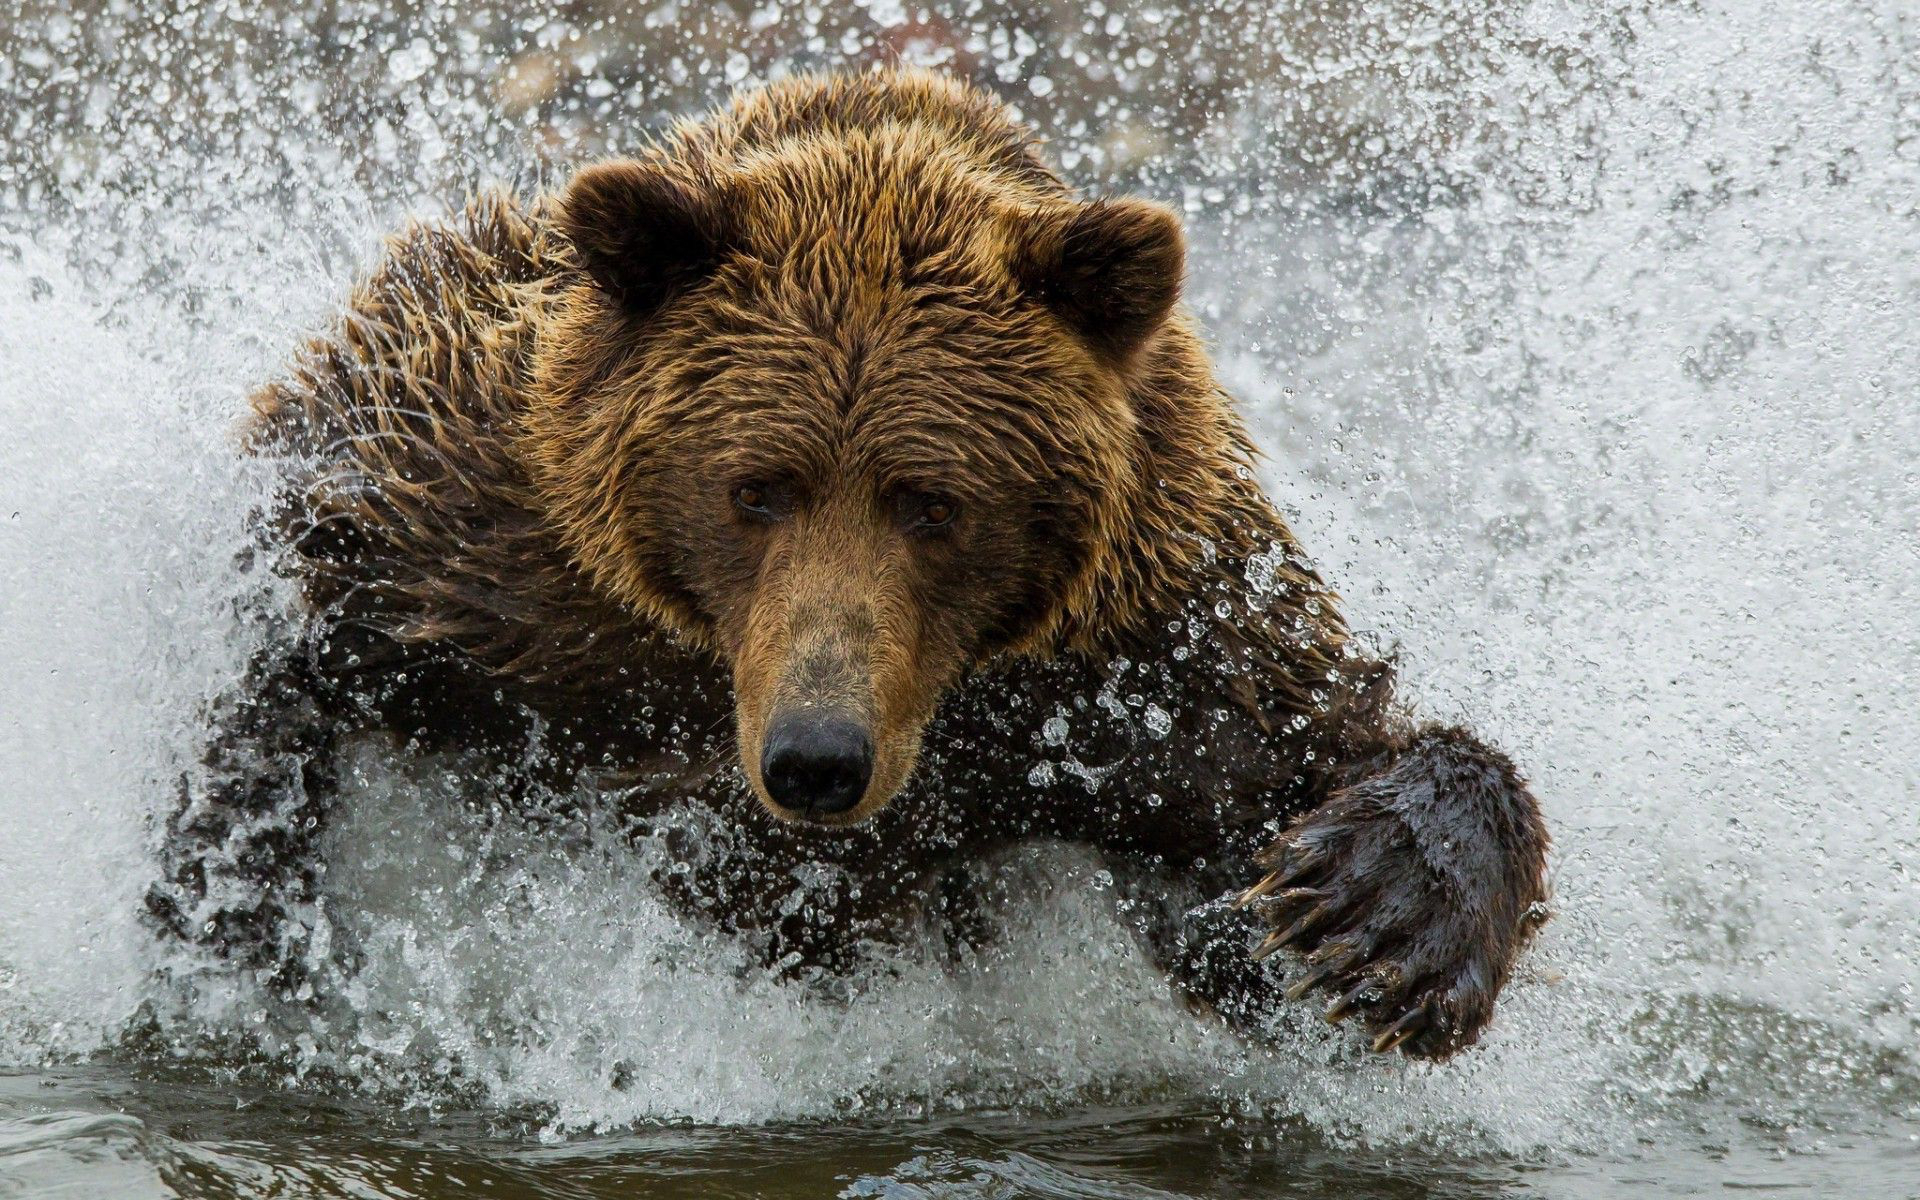

In [20]:
img

## Training

Train using CIFAR10 because I don't have time to train on Imagenet right now

In [4]:
import torchvision.transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split

class ContrastiveAugs:
    def __init__(self, ts):
        self.ts = ts

    def __call__(self, x):
        x1 = self.ts(x)
        x2 = self.ts(x)
        return x1, x2

augs = T.Compose([
        T.RandomHorizontalFlip(),
        T.RandomResizedCrop(size=96),
        T.RandomApply([T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)], p=0.8),
        T.RandomGrayscale(p=0.2),
        T.GaussianBlur(kernel_size=9),
        T.ToTensor(),
        T.Normalize((0.5,), (0.5,)),
])

ds = CIFAR10(
    root='cifar10_train',
    train=True,
    transform=ContrastiveAugs(augs),
    download=True
)
train_ds, val_ds = random_split(ds, (0.8, 0.2))


test_ds = CIFAR10(
    root='cifar10_test',
    train=False,
    transform=ContrastiveAugs,
    download=True,
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10_train/cifar-10-python.tar.gz to cifar10_train


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10_test/cifar-10-python.tar.gz to cifar10_test


In [5]:
import torch.nn.functional as F
def similarity(u, v):
    # Z_1..2*N
    z = torch.cat((u, v), 0)
    cos_sim = torch.cosine_similarity(z[:,None,:], z[None,:,:], -1)
    return cos_sim

# https://pytorch-lightning.readthedocs.io/en/stable/notebooks/course_UvA-DL/13-contrastive-learning.html
# https://github.com/Spijkervet/SimCLR/blob/master/simclr/modules/nt_xent.py
# https://github.com/google-research/simclr/blob/bfe07eed7f101ab51f3360100a28690e1bfbf6ec/objective.py#L38
def nt_xent(sim, temp):
    criterion = nn.CrossEntropyLoss()

    # ignore similarity with self
    mask = torch.eye(sim.size(0), dtype=torch.bool, device=sim.device)
    sim.masked_fill_(mask, -9e15)

    # TODO: does this actually work?
    # postive example is batch_size (N) away
    # everything else is negative example
    pos_mask = mask.roll(sim.size(0)//2, dims=-1)
    loss = criterion(sim/temp, pos_mask.float())

    return loss

In [16]:
nt_xent(similarity(a,b), 0.5)

tensor(1.5800)

In [7]:
# cos similarity example
a = torch.normal(0, 1, (2,10))
b = torch.normal(0, 1, (2,10))

a_norm = a.pow(2).sum(-1, keepdim=True).sqrt()
b_norm = b.pow(2).sum(-1, keepdim=True).sqrt()

cos_sim = (a/a_norm * b/b_norm).sum(-1).squeeze(-1)
cos_sim, torch.cosine_similarity(a, b, -1)

(tensor([0.4834, 0.3394]), tensor([0.4834, 0.3394]))

In [6]:
def train_model(model, train, val, optim, params):
    train_losses = []
    val_losses = []
    for i in range(params['epochs']):
        # training set
        train_loss = 0
        for ((X1, X2), _) in train:
            optim.zero_grad()

            z1 = model(X1.to(params['device']))
            z2 = model(X2.to(params['device']))
            
            sim = similarity(z1, z2)
            loss = nt_xent(sim, params['temp'])
            loss.backward()

            optim.step()

            train_losses.append(loss.item())
            # train_loss += loss.item()
        # train_losses.append(train_loss)
        
        # validation set
        # val_loss = 0
        # for ((X1, X2), _) in val:
        #     z1 = model(X1.to(params['device']))
        #     z2 = model(X2.to(params['device']))

        #     loss = nt_xent(z1, z2, params['temp'])
        #     val_loss += loss.item()
        # val_losses.append(val_loss)

    return train_losses, val_losses

In [ ]:
def fine_tune():
    ...

In [7]:
from torch.optim import Adam

# TODO: why tf is taking double memory when cifar=True?
# shouldn't it be less, or at most the same because the inital conv layer is smaller?

default_params = {
    'epochs': 1,
    'temp': 0.5,
    'bs': 128,
    'lr': 2e-4,
    'device': 'cuda',
}

params = default_params

model = SimCLR(TrainHead, resnet18=True, cifar=True).to(params['device'])
optim = Adam(model.parameters(), params['lr'])


train_dl = torch.utils.data.DataLoader(
    dataset=train_ds,
    batch_size=params['bs'],
    shuffle=True,
)

val_dl = torch.utils.data.DataLoader(
    dataset=train_ds,
    batch_size=params['bs'],
    shuffle=True,
)

In [8]:
train_losses, val_losses = train_model(model, train_dl, val_dl, optim, params)

([5.486877918243408,
  5.429350852966309,
  5.270752906799316,
  5.2925801277160645,
  5.29443883895874,
  5.2496232986450195,
  5.238808631896973,
  5.236234188079834,
  5.118271827697754,
  5.174083232879639,
  5.289517879486084,
  5.237924098968506,
  5.139558792114258,
  5.055831432342529,
  4.976284503936768,
  5.203190803527832,
  5.0884294509887695,
  5.09761905670166,
  5.098608016967773,
  5.0492706298828125,
  5.079639911651611,
  5.139310836791992,
  4.942460536956787,
  5.011707782745361,
  5.122298240661621,
  5.107246398925781,
  4.982762336730957,
  4.982383728027344,
  4.949310302734375,
  5.112401962280273,
  4.914736270904541,
  5.191041946411133,
  5.048287391662598,
  4.939602851867676,
  5.075591564178467,
  5.030486106872559,
  5.044641494750977,
  4.995236396789551,
  5.072569847106934,
  4.931122303009033,
  5.062080383300781,
  4.9511919021606445,
  4.982202529907227,
  4.945313453674316,
  4.8568525314331055,
  4.951997756958008,
  4.926731109619141,
  4.87939

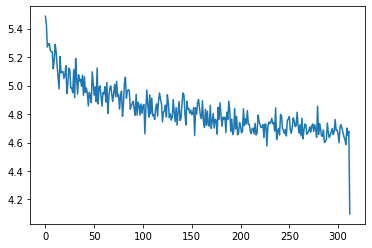

In [9]:
import matplotlib.pyplot as plt

# losses from one epoch
# forgot to save losses to variable, so copied from output
losses = [5.486877918243408,
  5.429350852966309,
  5.270752906799316,
  5.2925801277160645,
  5.29443883895874,
  5.2496232986450195,
  5.238808631896973,
  5.236234188079834,
  5.118271827697754,
  5.174083232879639,
  5.289517879486084,
  5.237924098968506,
  5.139558792114258,
  5.055831432342529,
  4.976284503936768,
  5.203190803527832,
  5.0884294509887695,
  5.09761905670166,
  5.098608016967773,
  5.0492706298828125,
  5.079639911651611,
  5.139310836791992,
  4.942460536956787,
  5.011707782745361,
  5.122298240661621,
  5.107246398925781,
  4.982762336730957,
  4.982383728027344,
  4.949310302734375,
  5.112401962280273,
  4.914736270904541,
  5.191041946411133,
  5.048287391662598,
  4.939602851867676,
  5.075591564178467,
  5.030486106872559,
  5.044641494750977,
  4.995236396789551,
  5.072569847106934,
  4.931122303009033,
  5.062080383300781,
  4.9511919021606445,
  4.982202529907227,
  4.945313453674316,
  4.8568525314331055,
  4.951997756958008,
  4.926731109619141,
  4.879395484924316,
  5.096296310424805,
  5.010960578918457,
  4.932566165924072,
  4.9899773597717285,
  4.887195587158203,
  5.123040199279785,
  4.870317459106445,
  4.98403787612915,
  4.998004913330078,
  4.927021503448486,
  4.854926109313965,
  4.9505414962768555,
  4.941594123840332,
  4.99187707901001,
  4.882616996765137,
  5.021458625793457,
  4.804333209991455,
  4.916781425476074,
  4.983137130737305,
  4.997483253479004,
  4.93900203704834,
  4.887875556945801,
  4.950282096862793,
  5.008785724639893,
  4.919808864593506,
  5.028519630432129,
  4.922627925872803,
  4.937679767608643,
  4.83528995513916,
  4.92772102355957,
  4.961092472076416,
  4.783935546875,
  4.86892032623291,
  5.019115924835205,
  5.0588765144348145,
  4.911303520202637,
  4.958986759185791,
  4.972015857696533,
  4.9621171951293945,
  4.833740234375,
  4.859360694885254,
  4.873213768005371,
  4.889534950256348,
  4.834505081176758,
  4.791323661804199,
  4.939231872558594,
  4.792241096496582,
  4.880805015563965,
  4.86273193359375,
  4.79208517074585,
  4.87093448638916,
  4.804816246032715,
  4.859366416931152,
  4.867509365081787,
  4.660595893859863,
  4.843207359313965,
  4.969289779663086,
  4.862605094909668,
  4.77886962890625,
  4.9353742599487305,
  4.8020734786987305,
  4.911426544189453,
  4.787923336029053,
  4.796226501464844,
  4.761934757232666,
  4.8420939445495605,
  4.871401786804199,
  4.785067558288574,
  4.897264003753662,
  4.948060035705566,
  4.901159286499023,
  4.871479034423828,
  4.744746208190918,
  4.813077926635742,
  4.821483612060547,
  4.862621784210205,
  4.779014587402344,
  4.935895919799805,
  4.878902912139893,
  4.774787902832031,
  4.800665855407715,
  4.757847785949707,
  4.777729034423828,
  4.902083873748779,
  4.8146209716796875,
  4.746904373168945,
  4.844577312469482,
  4.7217116355896,
  4.8138885498046875,
  4.888166427612305,
  4.755224227905273,
  4.771413326263428,
  4.876419544219971,
  4.94819450378418,
  4.93399715423584,
  4.8001708984375,
  4.723392486572266,
  4.888952732086182,
  4.834596633911133,
  4.839565277099609,
  4.805581092834473,
  4.827720642089844,
  4.795290470123291,
  4.806671142578125,
  4.846010208129883,
  4.648185729980469,
  4.843463897705078,
  4.801393032073975,
  4.881076812744141,
  4.901821136474609,
  4.836940765380859,
  4.781284332275391,
  4.768528938293457,
  4.893561363220215,
  4.748293876647949,
  4.705918788909912,
  4.833713531494141,
  4.720060348510742,
  4.820122241973877,
  4.721796035766602,
  4.714760780334473,
  4.861519813537598,
  4.699317932128906,
  4.74824333190918,
  4.804599761962891,
  4.701828956604004,
  4.763173580169678,
  4.75592041015625,
  4.659061431884766,
  4.846938133239746,
  4.761875629425049,
  4.879307746887207,
  4.789455890655518,
  4.713239669799805,
  4.778355121612549,
  4.76491641998291,
  4.777657508850098,
  4.669110298156738,
  4.813496112823486,
  4.76223087310791,
  4.8904829025268555,
  4.819646835327148,
  4.677031993865967,
  4.764976501464844,
  4.655340671539307,
  4.676409721374512,
  4.839653015136719,
  4.694427013397217,
  4.783304214477539,
  4.653960227966309,
  4.6655378341674805,
  4.740715026855469,
  4.716102600097656,
  4.667923450469971,
  4.6790876388549805,
  4.836536884307861,
  4.718499183654785,
  4.766540050506592,
  4.730566501617432,
  4.823726177215576,
  4.728353977203369,
  4.727456569671631,
  4.678915023803711,
  4.662604331970215,
  4.698801517486572,
  4.70058536529541,
  4.660397529602051,
  4.735022068023682,
  4.652712821960449,
  4.666470527648926,
  4.79313850402832,
  4.748175144195557,
  4.727183818817139,
  4.704905033111572,
  4.707972526550293,
  4.725897789001465,
  4.633452415466309,
  4.729766845703125,
  4.72857666015625,
  4.57513427734375,
  4.706140995025635,
  4.744206428527832,
  4.732346534729004,
  4.74136209487915,
  4.769619941711426,
  4.7319488525390625,
  4.739367485046387,
  4.680074691772461,
  4.843487739562988,
  4.621279239654541,
  4.679581642150879,
  4.698852062225342,
  4.652084827423096,
  4.797240257263184,
  4.788424491882324,
  4.6981401443481445,
  4.682927131652832,
  4.662830829620361,
  4.692139148712158,
  4.645495414733887,
  4.7562055587768555,
  4.764365196228027,
  4.782115459442139,
  4.6901140213012695,
  4.664586067199707,
  4.704562187194824,
  4.7728705406188965,
  4.753805637359619,
  4.711771011352539,
  4.717242240905762,
  4.81254768371582,
  4.7212114334106445,
  4.664804458618164,
  4.725234508514404,
  4.646401405334473,
  4.771188735961914,
  4.625918388366699,
  4.685181140899658,
  4.729482650756836,
  4.726136684417725,
  4.657890319824219,
  4.668265342712402,
  4.680933952331543,
  4.710214614868164,
  4.6722869873046875,
  4.714787483215332,
  4.730471134185791,
  4.677145004272461,
  4.724689960479736,
  4.692255973815918,
  4.636188507080078,
  4.854619979858398,
  4.656631946563721,
  4.733025550842285,
  4.698139667510986,
  4.646239757537842,
  4.643078804016113,
  4.687850475311279,
  4.600142955780029,
  4.607338905334473,
  4.619645118713379,
  4.73598051071167,
  4.669411659240723,
  4.634883403778076,
  4.65191650390625,
  4.674242973327637,
  4.6986799240112305,
  4.65598201751709,
  4.675320625305176,
  4.76134729385376,
  4.685747146606445,
  4.6879987716674805,
  4.660426139831543,
  4.5987091064453125,
  4.707225799560547,
  4.725339889526367,
  4.700118541717529,
  4.67082405090332,
  4.64139461517334,
  4.621495723724365,
  4.5858635902404785,
  4.701727390289307,
  4.650586128234863,
  4.678969383239746,
  4.0983781814575195]
plt.plot(losses)